# **Test Assignment - The Van Westendorp Pricing Model**
## **Davit Davtyan**

### **Intro**

I decided to implement the Van Westendorp Price Sensitivity Meter (PSM) method. 

**Hypothetical Case:** I am researching the price sensitivity for a new smartwatch.

**My Assumptions:**
- The target audience consists of tech-aware individuals aged 25-40.
- The price responses follow a normal distribution with some variation.
- The sample size is 200 respondents.

**Questions:**
Participants are asked the following four questions:

- **Too Expensive:** At what price would you consider the product to be too expensive and would not consider buying it?
- **Too Cheap:** At what price would you consider the product to be so cheap that you would question its quality and not buy it?
- **Expensive but Acceptable:** At what price would you consider the product to be expensive but still buy it?
- **Bargain:** At what price would you consider the product to be a bargain, getting a good deal for the price?

#### **1. Generate the synthetic data**

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from intersect import intersection

In [191]:
def generate_synthetic_data(num_responses=300):
    np.random.seed(42)
    too_cheap = np.random.normal(150, 100, num_responses)  
    cheap = np.random.normal(250, 100, num_responses)    
    expensive = np.random.normal(350, 100, num_responses)  
    too_expensive = np.random.normal(450, 150, num_responses) 
    
    too_cheap = np.clip(too_cheap, 0, None)
    cheap = np.clip(cheap, 0, None)
    expensive = np.clip(expensive, 0, None)
    too_expensive = np.clip(too_expensive, 0, None)

    data = pd.DataFrame({
        'too_cheap': too_cheap,
        'cheap': cheap,
        'expensive': expensive,
        'too_expensive': too_expensive,
    })
    return data

#### **2. Define the function for the analysis** 

In [192]:
def van_westendorp_analysis(data):
    sorted_data = {
        'too_expensive': np.sort(data['too_expensive']),
        'too_cheap': np.sort(data['too_cheap']),
        'expensive': np.sort(data['expensive']),
        'cheap': np.sort(data['cheap']),
    }
    n = len(data)
    
    cumulative_percent = np.arange(1, n + 1) / n * 100
    
    return sorted_data, cumulative_percent

#### **3. Define functions for plotting the results** 

In [208]:
def find_intersections(sorted_data, cumulative_percent):
    x1, y1 = sorted_data['too_cheap'], 100 - cumulative_percent
    x2, y2 = sorted_data['expensive'], cumulative_percent
    pmc_x, pmc_y = intersection(x1, y1, x2, y2)

    x1, y1 = sorted_data['cheap'], 100 - cumulative_percent
    x2, y2 = sorted_data['too_expensive'], cumulative_percent
    pme_x, pme_y = intersection(x1, y1, x2, y2)

    x1, y1 = sorted_data['too_cheap'], 100 - cumulative_percent
    x2, y2 = sorted_data['too_expensive'], cumulative_percent
    opp_x, opp_y = intersection(x1, y1, x2, y2)

    return pmc_x[0], pme_x[0], opp_x[0], pmc_y[0], pme_y[0], opp_y[0] if pmc_x.size and pme_x.size and opp_x.size else (None, None, None, None, None, None)


def plot_van_westendorp(sorted_data, cumulative_percent):
    plt.figure(figsize=(16, 9))
    
    plt.plot(sorted_data['too_expensive'], cumulative_percent, label='Too Expensive', color='purple')
    plt.plot(sorted_data['too_cheap'], 100 - cumulative_percent, label='Too Cheap', color='red')
    plt.plot(sorted_data['expensive'], cumulative_percent, label='Expensive but Acceptable', color='blue')
    plt.plot(sorted_data['cheap'], 100 - cumulative_percent, label='Cheap', color='orange')
    
    plt.xlabel('Price ($)', fontsize=14)
    plt.ylabel('Cumulative Percentage (%)', fontsize=14)
    plt.title('Van Westendorp Price Sensitivity Meter', fontsize=18, fontweight='bold')
    plt.legend()
    plt.grid(True)

    pmc_x, pme_x, opp_x, pmc_y, pme_y, opp_y = find_intersections(sorted_data, cumulative_percent)

    if pmc_x and pme_x:
        plt.axvspan(pmc_x, pme_x, color='gray', alpha=0.3, label='Acceptable Price Range')
        plt.text((pmc_x + pme_x) / 2, 95, f'${pmc_x:.2f} - ${pme_x:.2f}',
                 color='black', fontsize=12, ha='center', va='center', backgroundcolor='white')

    text_props = dict(facecolor='white', edgecolor='none', alpha=0.8, boxstyle='round,pad=0.5')
    if pmc_x:
        plt.annotate(f'PMC ${pmc_x:.2f}', (pmc_x, pmc_y), textcoords="offset points", xytext=(-40,-60),
                     ha='center', fontsize=12, arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), bbox=text_props)
    if pme_x:
        plt.annotate(f'PME ${pme_x:.2f}', (pme_x, pme_y), textcoords="offset points", xytext=(40,60),
                     ha='center', fontsize=12, arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), bbox=text_props)
    if opp_x:
        plt.annotate(f'OPP ${opp_x:.2f}', (opp_x, opp_y), textcoords="offset points", xytext=(-40,60),
                     ha='center', fontsize=12, arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), bbox=text_props)

    plt.legend()
    plt.show()

#### **4. Implementation**

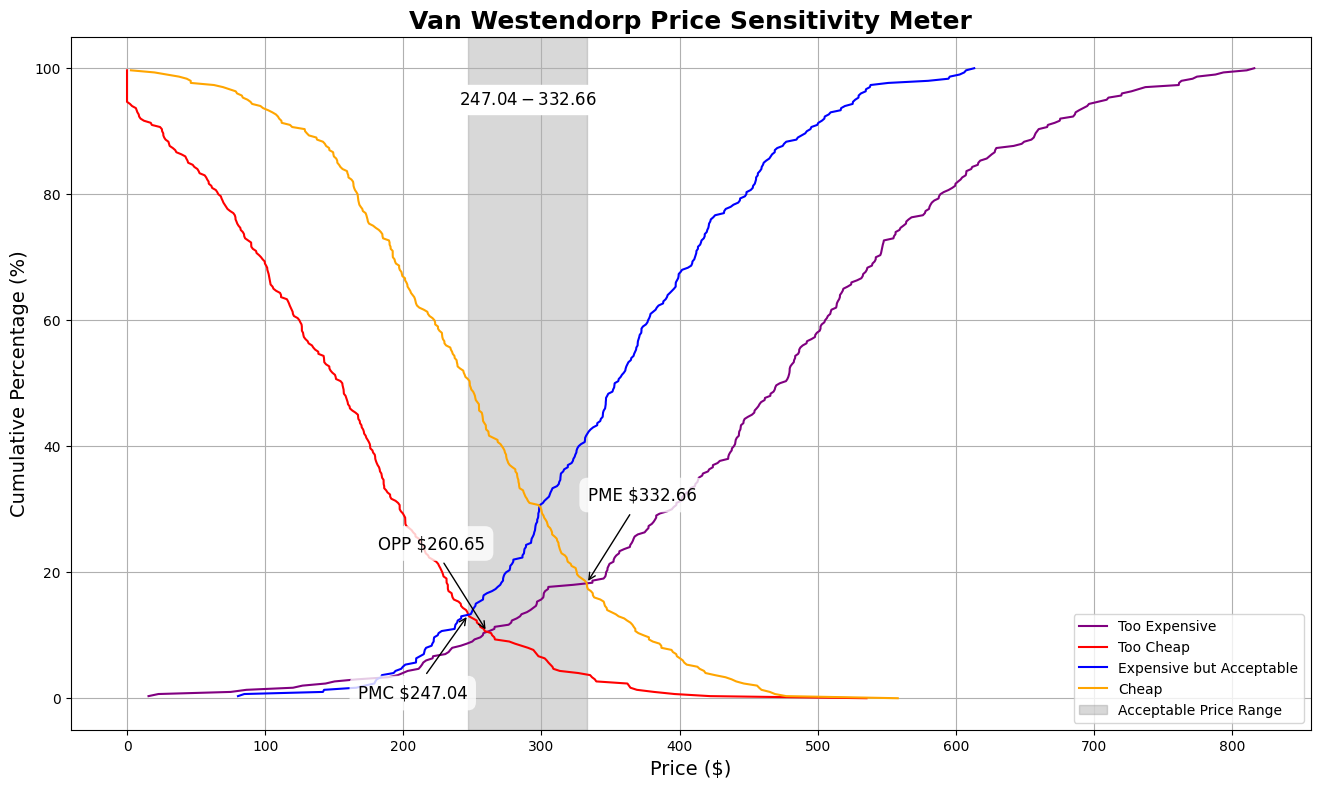

In [209]:
data = generate_synthetic_data()
sorted_data, cumulative_percent = van_westendorp_analysis(data)
plot_van_westendorp(sorted_data, cumulative_percent)

#### **Interpretation**

The **Optimal Price Point (OPP)** at approximately $260.65 suggests a price at which an equal number of consumers consider the product to be either getting expensive or a bargain. This price point can be considered a balanced choice where the product is perceived as neither too cheap nor too expensive by most potential customers.

The **Point of Marginal Cheapness (PMC)** at about $247.04 suggests the lowest price at which the product is considered as too cheap, which could affect the perceived quality negatively.
The **Point of Marginal Expensiveness (PME)** at approximately $332.66 suggests the highest price at which the product begins to be viewed as quite expensive by most consumers.
The range between **PMC** and **PME** ($247.04 to $332.66) is the **Acceptable Price Range** where the majority of consumers find the price reasonable.

Below the **PMC**, increasing the price might not significantly affect demand as the product is considered too cheap.
Above the **PME**, the product is considered too expensive, which can potentially lead to a significant drop in demand. 

I would set the price of the product within the acceptable price range of $247.04 to $332.66, as it's the way to maximize market acceptance while maintaining a healthy margin.
For a more competitive edge in a price-sensitive segment, I would consider pricing strategies closer to the PMC, as it will ensure that the product still maintains a perceived quality above the "too cheap" threshold.

#### **END**